<a href="https://colab.research.google.com/github/Rahama1996/Customer_segmentation/blob/main/Copy_of_Copy_of_Customer_Segmantation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
customers = pd.read_csv('Mall_Customers.csv')
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
customers.drop('CustomerID', axis=1, inplace= True)

In [ ]:
one_hot_encoded_data = pd.get_dummies(customers, columns = ['Gender'])
one_hot_encoded_data

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
195,35,120,79,1,0
196,45,126,28,1,0
197,32,126,74,0,1
198,32,137,18,0,1


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [ ]:
clustering = DBSCAN(eps=12, min_samples=5).fit(one_hot_encoded_data)
DBSCAN_dataset = one_hot_encoded_data.copy()
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_

In [ ]:
DBSCAN_dataset.Cluster.value_counts().to_frame()

,Cluster
0,100
-1,37
3,34
4,17
1,6
2,6


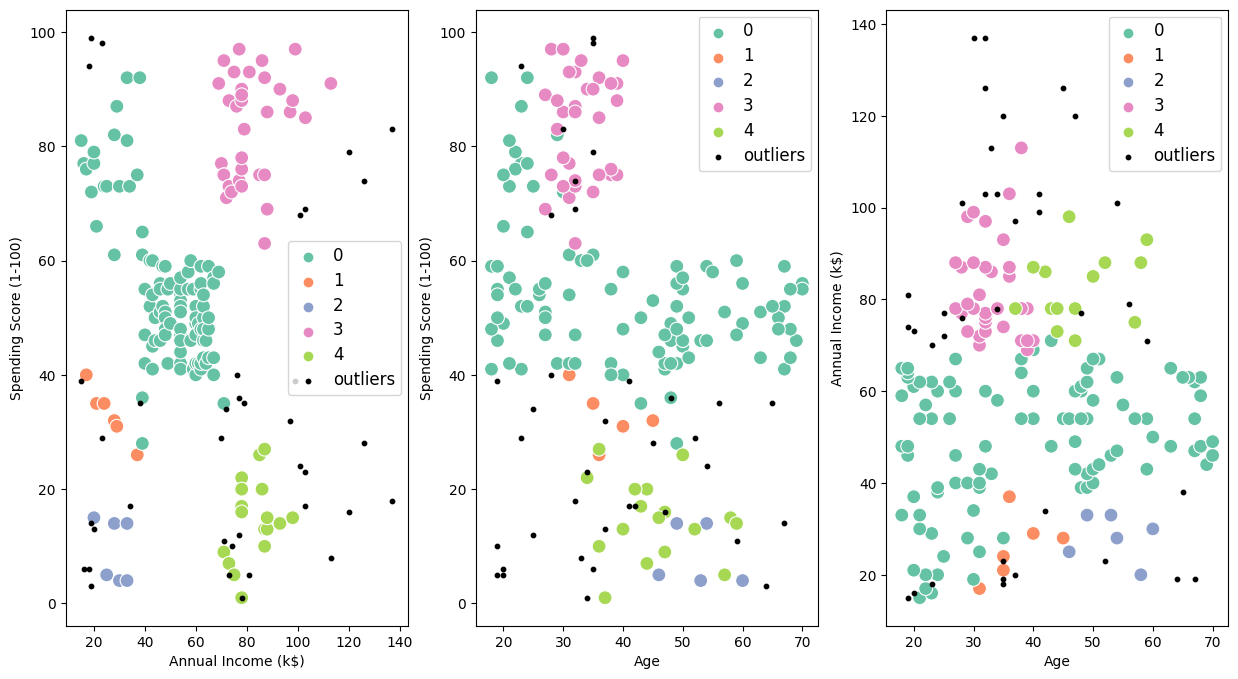

In [ ]:
outliers = DBSCAN_dataset[DBSCAN_dataset['Cluster']==-1]

fig2, (axes) = plt.subplots(1,3,figsize=(15,8))

sns.scatterplot(x='Annual Income (k$)',y= 'Spending Score (1-100)',

                data=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1],

                hue='Cluster', ax=axes[0], palette='Set2', legend='full', s=100)

sns.scatterplot(x = 'Age', y = 'Spending Score (1-100)',

                data=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1],

                hue='Cluster', palette='Set2', ax=axes[1], legend='full', s=100)
sns.scatterplot(x = 'Age', y = 'Annual Income (k$)',

                data=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1],

                hue='Cluster', palette='Set2', ax=axes[2], legend='full', s=100)

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=10, label='outliers', c="k")

axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=10, label='outliers', c="k")
axes[2].scatter(outliers['Age'], outliers['Annual Income (k$)'], s=10, label='outliers', c="k")
axes[0].legend()
axes[1].legend()
axes[2].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='12')
plt.setp(axes[1].get_legend().get_texts(), fontsize='12')
plt.setp(axes[2].get_legend().get_texts(), fontsize='12')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
sse=[]
clusters=[]
iterations=[]
for k in range(1,11):
  kmeans= KMeans(init="random",n_clusters=k,n_init=10,max_iter=300,random_state=42)
  kmeans.fit(one_hot_encoded_data)
  sse.append(kmeans.inertia_)
  clusters.append(kmeans.cluster_centers_)
  iterations.append(kmeans.n_iter_)

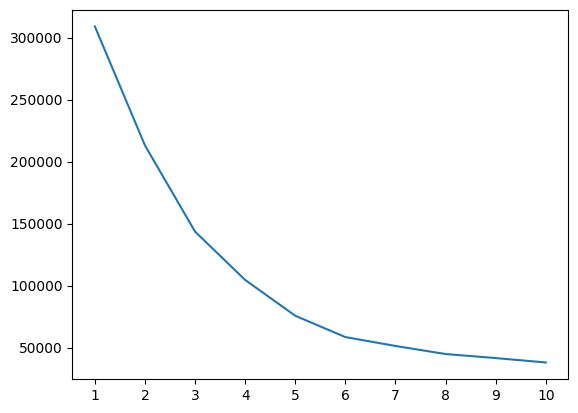

In [ ]:
plt.plot(range(1,11), sse)
plt.xticks(range(1,11))
plt.show()

In [ ]:
from kneed import  KneeLocator

In [ ]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow


4

In [ ]:
print(sse[3])
# Final locations of the centroid
print(clusters[3])
# The number of iterations required to converge
print(iterations[3])


104463.19922884133
[[32.69230769 86.53846154 82.12820513  0.53846154  0.46153846]
 [24.82142857 28.71428571 74.25        0.5         0.5       ]
 [44.89473684 48.70526316 42.63157895  0.62105263  0.37894737]
 [40.39473684 87.         18.63157895  0.47368421  0.52631579]]
13


In [ ]:
kmeans4= KMeans(init="random",n_clusters=4,n_init=10,max_iter=300,random_state=42)
kmeans4.fit(one_hot_encoded_data)
kmeans4_dataset = one_hot_encoded_data.copy()
kmeans4_dataset.loc[:,'Cluster'] = kmeans4.labels_
kmeans4_dataset

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,Cluster
0,19,15,39,0,1,1
1,21,15,81,0,1,1
2,20,16,6,1,0,2
3,23,16,77,1,0,1
4,31,17,40,1,0,2
...,...,...,...,...,...,...
195,35,120,79,1,0,0
196,45,126,28,1,0,3
197,32,126,74,0,1,0
198,32,137,18,0,1,3


In [ ]:
kmeans4_dataset.Cluster.value_counts().to_frame()

,Cluster
2,95
0,39
3,38
1,28


In [ ]:
centroid_array= np.array(clusters[3])
centroid_array

array([[32.69230769, 86.53846154, 82.12820513,  0.53846154,  0.46153846],
       [24.82142857, 28.71428571, 74.25      ,  0.5       ,  0.5       ],
       [44.89473684, 48.70526316, 42.63157895,  0.62105263,  0.37894737],
       [40.39473684, 87.        , 18.63157895,  0.47368421,  0.52631579]])

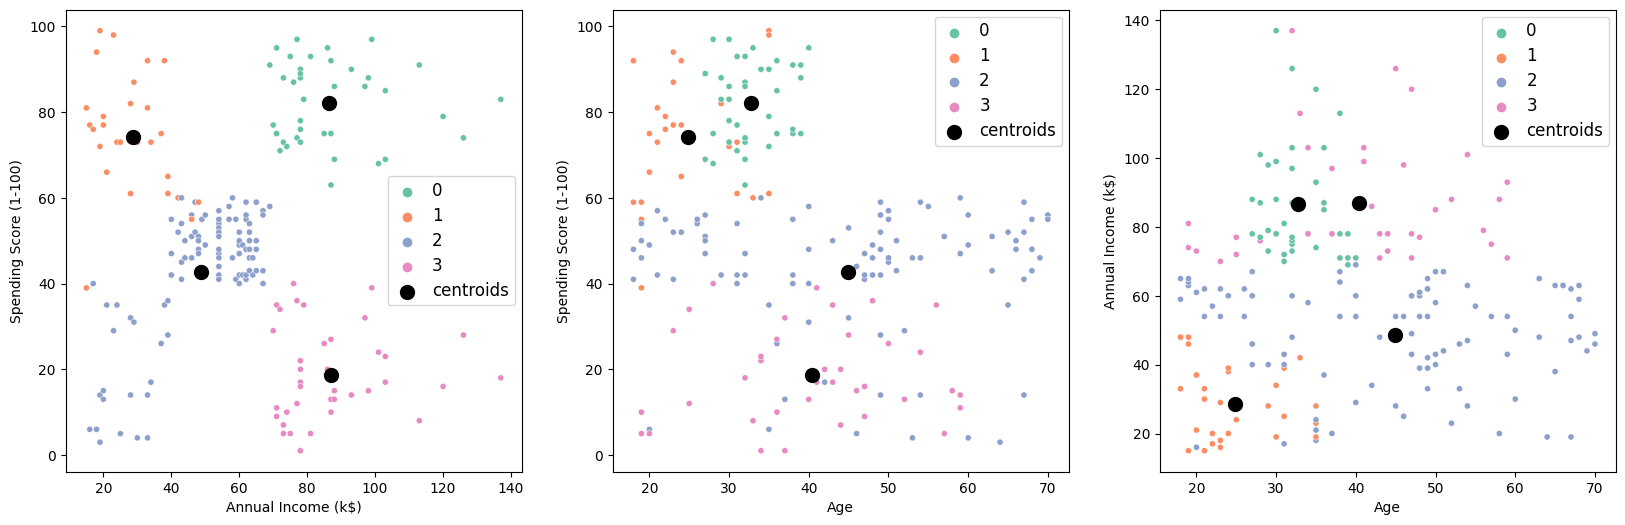

In [ ]:

fig2, (axes) = plt.subplots(1,3,figsize=(20,6))

sns.scatterplot(x='Annual Income (k$)',y= 'Spending Score (1-100)',

                data=kmeans4_dataset,

                hue='Cluster', ax=axes[0], palette='Set2', legend='full', s=20)

sns.scatterplot(x = 'Age', y = 'Spending Score (1-100)',

                data=kmeans4_dataset,

                hue='Cluster', palette='Set2', ax=axes[1], legend='full', s=20)
sns.scatterplot(x = 'Age', y = 'Annual Income (k$)',

                data=kmeans4_dataset,

                hue='Cluster', palette='Set2', ax=axes[2], legend='full', s=20)


axes[0].scatter(centroid_array[:,1], centroid_array[:,2], s=100, label='centroids', c="k")
axes[1].scatter(centroid_array[:,0], centroid_array[:,2], s=100, label='centroids', c="k")
axes[2].scatter(centroid_array[:,0], centroid_array[:,1], s=100, label='centroids', c="k")

axes[0].legend()
axes[1].legend()
axes[2].legend()


plt.setp(axes[0].get_legend().get_texts(), fontsize='12')
plt.setp(axes[1].get_legend().get_texts(), fontsize='12')
plt.setp(axes[2].get_legend().get_texts(), fontsize='12')

plt.show()